## Face Recognition using Eigenfaces - PCA (Principal Component Analysis)

In [ ]:
import numpy as np
from numpy import asarray
from PIL import Image
import glob as glob
import pandas as pd
import skimage.io as skio

import matplotlib.pyplot as plt
import matplotlib.image as imread

import os
import zipfile

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CV/Faces_training_and_testing_images.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/Faces_training_and_testing_images')) # Shoul be 2 for the train and test directories

2

In [ ]:
train_dir = '/tmp/Faces_training_and_testing_images/Train/'
test_dir = '/tmp/Faces_training_and_testing_images/Test/'

train_set_dir = os.listdir(train_dir)
test_set_dir = os.listdir(test_dir)

In [ ]:
print(len(train_set_dir))

141


In [ ]:
remove_files = ['/tmp/Faces_training_and_testing_images/Train/1_2.jpg', '/tmp/Faces_training_and_testing_images/Train/2_31.jpg', '/tmp/Faces_training_and_testing_images/Train/2_44.jpg', '/tmp/Faces_training_and_testing_images/Train/4_29.jpg', '/tmp/Faces_training_and_testing_images/Train/4_41.jpg', '/tmp/Faces_training_and_testing_images/Train/5_15.jpg' ]
for myfile in remove_files:
  if os.path.isfile(myfile):
    os.remove(myfile)
    print("Image %s removed from directory." % os.path.basename(myfile).split('/')[-1])
  else:
    print("Image %s not found in directory." % os.path.basename(myfile).split('/')[-1])

Image 1_2.jpg removed from directory.
Image 2_31.jpg removed from directory.
Image 2_44.jpg removed from directory.
Image 4_29.jpg removed from directory.
Image 4_41.jpg removed from directory.
Image 5_15.jpg removed from directory.


In [ ]:
print(len(os.listdir(train_dir)))

135


In [ ]:
train_id_dir = set([f.split('_')[0] for f in train_set_dir])
print(train_id_dir)
test_id_dir = set([f.split('_')[0] for f in test_set_dir])
print(test_id_dir)
print(train_id_dir <= test_id_dir)

{'2', '3', '1', '5', '4'}
{'2', '3', '1', '5', '4'}
True


In [ ]:
img = Image.open('/tmp/Faces_training_and_testing_images/Train/1_11.jpg')

# Get the width and heigth of an image
width = img.width
height = img.height

print("The height of one image is: ", height)
print("The width of one image is: ", width)
print(img.size)

folder_images = '/tmp/Faces_training_and_testing_images/Train'
size_images = {}
comp_img = [(30,40)]


# Verify if all the images from the training set have the same size
for image_path in glob.glob('/tmp/Faces_training_and_testing_images/Train/*.jpg'):
  path = image_path
  image_name = os.path.basename(path).split('/')[-1]
  with Image.open(image_path) as img:
    img_dim = img.size
    if img_dim in comp_img:
      size_images[image_name] = {'Img Width': img_dim[0], 'Img Height' : img_dim[1]}

print(size_images)
if len(size_images) == len(os.listdir(folder_images)):
  print("All the images have the same size")

The height of one image is:  40
The width of one image is:  30
(30, 40)
{'3_2.jpg': {'Img Width': 30, 'Img Height': 40}, '4_17.jpg': {'Img Width': 30, 'Img Height': 40}, '5_58.jpg': {'Img Width': 30, 'Img Height': 40}, '3_52.jpg': {'Img Width': 30, 'Img Height': 40}, '3_36.jpg': {'Img Width': 30, 'Img Height': 40}, '5_56.jpg': {'Img Width': 30, 'Img Height': 40}, '1_41.jpg': {'Img Width': 30, 'Img Height': 40}, '3_57.jpg': {'Img Width': 30, 'Img Height': 40}, '3_40.jpg': {'Img Width': 30, 'Img Height': 40}, '1_48.jpg': {'Img Width': 30, 'Img Height': 40}, '4_62.jpg': {'Img Width': 30, 'Img Height': 40}, '5_50.jpg': {'Img Width': 30, 'Img Height': 40}, '5_36.jpg': {'Img Width': 30, 'Img Height': 40}, '1_50.jpg': {'Img Width': 30, 'Img Height': 40}, '2_3.jpg': {'Img Width': 30, 'Img Height': 40}, '5_19.jpg': {'Img Width': 30, 'Img Height': 40}, '1_15.jpg': {'Img Width': 30, 'Img Height': 40}, '2_50.jpg': {'Img Width': 30, 'Img Height': 40}, '5_42.jpg': {'Img Width': 30, 'Img Height': 40}

Train images: 


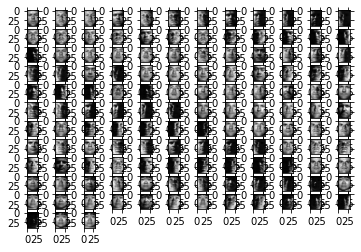

Training tensor:  [[ 51.  57.  83. ...  10.  12.   9.]
 [ 65.  98. 118. ...  20.  29.  29.]
 [ 50.  77. 100. ...   5.   7.   9.]
 ...
 [  0.   0.   0. ... 198. 209. 215.]
 [  8.   4.  11. ... 111. 125. 123.]
 [ 13.  13.  12. ...  95. 111. 107.]]
Training tensor shape:  (135, 1200)
Test images: 
['2_47.jpg', '2_32.jpg', '2_7.jpg', '3_24.jpg', '4_40.jpg', '1_49.jpg', '5_45.jpg', '2_51.jpg', '5_16.jpg', '3_22.jpg', '4_10.jpg', '2_37.jpg', '5_18.jpg', '4_1.jpg', '1_45.jpg', '4_46.jpg', '1_38.jpg', '1_12.jpg', '2_15.jpg', '4_42.jpg', '5_6.jpg', '3_20.jpg', '5_24.jpg', '4_34.jpg', '3_49.jpg', '3_37.jpg', '5_53.jpg', '2_2.jpg', '2_17.jpg', '3_12.jpg', '2_59.jpg', '4_6.jpg', '4_32.jpg', '4_37.jpg', '3_30.jpg', '3_28.jpg', '3_45.jpg', '5_49.jpg', '1_26.jpg', '2_43.jpg', '1_6.jpg', '4_28.jpg', '4_52.jpg', '4_56.jpg', '5_55.jpg', '2_39.jpg', '5_8.jpg', '4_16.jpg', '1_57.jpg', '3_16.jpg', '5_47.jpg', '2_5.jpg', '1_42.jpg', '2_30.jpg', '1_3.jpg', '1_22.jpg', '5_33.jpg', '5_57.jpg', '3_26.jpg', '1_1

<ipython-input-14-b9d63e8b5203>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(13, 13, i+1)


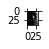

In [ ]:
print("Train images: ")

# train_image_names = os.listdir(train_dir)
train_image_names = sorted(filter(lambda x: os.path.isfile(os.path.join(train_dir, x)), os.listdir(train_dir)))
training_tensor = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
  img = plt.imread(train_dir + train_image_names[i])
  training_tensor[i,:] = np.array(img, dtype='float64').flatten()
  plt.subplot(12,12, i+1)
  plt.imshow(img, cmap='gray')
  plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
plt.show()

print("Training tensor: ", training_tensor)
print("Training tensor shape: ", training_tensor.shape)

print("Test images: ")
test_image_names = os.listdir(test_dir)
print(test_image_names)
testing_tensor = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for j in range(len(test_image_names)):
  img = plt.imread(test_dir + test_image_names[j])
  testing_tensor[j,:] = np.array(img, dtype='float64').flatten()
  plt.subplot(13, 13, i+1)
  plt.imshow(img, cmap='gray')
  plt.tick_params(labelleft='off',labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
plt.show()

# The "average" face
- Calculating the sum of all the pictures divided by the number of pictures

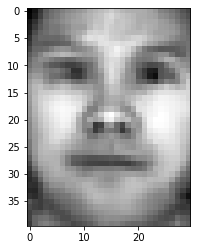

In [ ]:
mean_face = np.zeros((1, height * width))

for i in training_tensor:
  mean_face = np.add(mean_face, i)
mean_face = np.divide(mean_face, float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.show()

# Normalize the training set
- subtract for each picture in the training set the mean that was calculated previously
- in order to create a system that is able to represent any face
- Basically, we calculate the elements that all faces have in common
- The features that distinguish each picture from the others can be found by extracting the "mean face" from the pictures

In [ ]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width)) # 141 , 40x30
print(normalised_training_tensor.shape)

for i in range(len(train_image_names)):
  normalised_training_tensor[i] = np.subtract(training_tensor[i], mean_face)

(135, 1200)


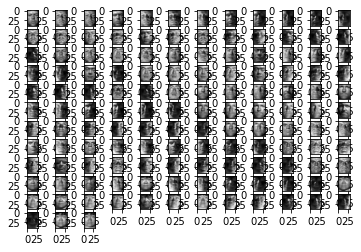

In [ ]:
for i in range(len(train_image_names)):
  img = normalised_training_tensor[i].reshape(height, width)
  plt.subplot(12, 12, i+1)
  plt.imshow(img, cmap='gray')
plt.show()

# =============================================================

# Training Set + Test Set

In [ ]:
def load_train_test_set():
  train_image_names = sorted(filter(lambda x: os.path.isfile(os.path.join(train_dir, x)), os.listdir(train_dir)))
  images = np.ndarray(shape=(len(train_image_names), height, width)) # (135, 40, 30)
  label = np.ndarray(shape=(len(train_image_names)), dtype='int32') # (135,)
  print("Original shape of the label: ", label.shape)
  print("Original shape of the train images: ", images.shape)

  for i in range(len(train_image_names)):
    img = plt.imread(train_dir + train_image_names[i])
    images[i,:,:] = np.array(img, dtype='float64')
    label[i] = np.array(train_image_names[i][0], dtype='int32')

  # Create a test set that has one face for each person
  test_index = list(range(1, 135, 27))
  images_test = images[test_index]
  label_test = label[test_index]
  print("Shape of the test images: ", images_test.shape)
  print("Shape of the test label: ", label_test.shape)

  # Create a training set with the remaining faces
  images_train = images.copy()
  label_train = label.copy()
  for i in test_index[::-1]:
    images_train = np.delete(images_train, i, axis = 0)
    label_train = np.delete(label_train, i, axis = 0)
  print("Shape of the train images:", images_train.shape)
  print("Shape of the train label: ", label_train.shape)

  # test_image_names = sorted(filter(lambda x: os.path.isfile(os.path.join(test_dir, x)), os.listdir(test_dir)))
  # print("Test_image_names: ", test_image_names)
  # images_test = np.ndarray(shape=(5, height, width))
  # have = [0] * 5
  # j = 0
  # for i in range(len(test_image_names)):
  #   if test_image_names[i].startswith('1') and have[0] == 0:
  #     img = plt.imread(test_dir + test_image_names[i])
  #     have[0] = 1
  #     images_test[j,:,:] = np.array(img, dtype='float64')

  return images_train, label_train, images_test, label_test

In [ ]:
images_train, label_train, images_test, label_test = load_train_test_set()

Original shape of the label:  (135,)
Original shape of the train images:  (135, 40, 30)
Shape of the test images:  (5, 40, 30)
Shape of the test label:  (5,)
Shape of the train images: (130, 40, 30)
Shape of the train label:  (130,)


# A plot of some training images

In [ ]:
def plot_training_sample(images_train, images_test):
    fig = plt.figure()
    fig.add_subplot(1, 4, 1)
    plt.imshow(images_train[0], cmap='gray')
    fig.add_subplot(1, 4, 2)
    plt.imshow(images_train[1], cmap='gray')
    fig.add_subplot(1, 4, 3)
    plt.imshow(images_train[9], cmap='gray')
    fig.add_subplot(1, 4, 4)
    plt.imshow(images_train[10], cmap='gray')
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(images_test[0], cmap='gray')
    fig.add_subplot(1, 2, 2)
    plt.imshow(images_test[1], cmap='gray')


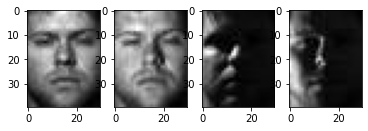

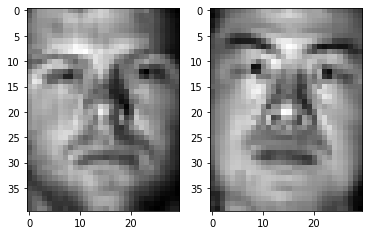

In [ ]:
plot_training_sample(images_train, images_test)

# The "average" face

In [ ]:
def mean_face(images_train):
  mean_face = np.zeros((1, height * width))

  for i in training_tensor:
    mean_face = np.add(mean_face, i)
  mean_face = np.divide(mean_face, float(len(train_image_names))).flatten()

  plt.imshow(mean_face.reshape(height, width), cmap='gray')
  plt.show()


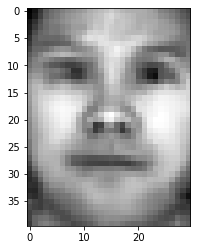

In [ ]:
mean_face(images_train)

In [ ]:
def data_processing(images_train, images_test):
  x_train = np.reshape(images_train, (images_train.shape[0], -1))
  x_test = np.reshape(images_test, (images_test.shape[0], -1))


  mu = np.mean(x_train, axis=0)
  std_dev = np.mean(x_train, axis = 0)
  std_dev_mod = np.copy(std_dev)
  std_dev_mod[std_dev == 0 ] = 1

  # Normal distribution
  x_train = (x_train - mu) / std_dev_mod
  x_test = (x_test - mu) / std_dev_mod

  # Data is normalized and unit-less - same range
  print("x_train: ", x_train)
  print("x_train.shape: ", x_train.shape)

  print("x_test: ", x_test)
  print("x_test.shape: ", x_test.shape)
  return x_train, x_test

In [ ]:
x_train, x_test = data_processing(images_train, images_test)

x_train:  [[ 0.66457444  0.55901536  0.7558991  ... -0.85921594 -0.81116088
  -0.85174861]
 [ 0.63193573  1.10603829  1.11554109 ... -0.92960797 -0.88984384
  -0.85174861]
 [ 0.63193573  0.75047339  1.20016273 ... -0.91552956 -0.92131703
  -0.90116574]
 ...
 [-1.         -1.         -1.         ...  1.78752437  2.28894807
   2.54156107]
 [-0.73889028 -0.89059541 -0.76729048 ...  0.56270305  0.9670742
   1.02610238]
 [-0.57569671 -0.64443509 -0.74613507 ...  0.33744856  0.74676189
   0.76254435]]
x_train.shape:  (130, 1200)
x_test:  [[ 1.12151644  1.68041237  1.49633849 ... -0.71843188 -0.54363878
  -0.52230106]
 [-0.57569671 -0.20681675  0.12123678 ... -0.54949101 -0.85837066
  -0.96705525]
 [ 1.15415516  1.18809173  1.15785191 ... -0.42278536 -0.38627285
  -0.40699442]
 [ 0.5666583   0.34020619  0.22701383 ... -0.46502058 -0.43348263
  -0.45641156]
 [-0.47778057 -0.61708395 -0.59804719 ... -0.35239333  0.13303474
   0.20248353]]
x_test.shape:  (5, 1200)


# PCA

In [ ]:
class PCA():
  def __init__(self, optimize = False):
    self.optimize = optimize

  def __covariance_matriX(self, X):
    if self.optimize:
      return X @ X.T
    else:
      return X.T @ X

  def __get_eigenvectors_sorted_by_eigenvals(self, S):
    w, v = np.linalg.eig(S) # Computes the eigenvalues and eigenvectors
    sorted_indeX = np.argsort(w)[::-1]
    eigenvals = w[sorted_indeX]
    eigenvecs = v[:,sorted_indeX]
    return eigenvals, eigenvecs

  def __get_eigenvec_for_original_matriX(self, X, eigenvecs):
    U = X.T @ eigenvecs
    return U

  def fit(self, X):
    S = self.__covariance_matriX(X)
    eigenvals, eigenvecs = self.__get_eigenvectors_sorted_by_eigenvals(S)
    if self.optimize:
      B = self.__get_eigenvec_for_original_matriX(X, eigenvecs)
    else:
      B = eigenvecs

    self.__B = B
    self.__w = eigenvals
    return B

  def plot_eigenvals(self):
    C = np.cumsum(self.__w)
    plt.plot(C)

  def get_num_components (self, variance_threshold):
    variance_ratio = self.__w/np.sum(self.__w)
    S = 0
    i =-1
    while S < variance_threshold and S < 1.0:
      i += 1
      S += variance_ratio[i]
    return i


In [ ]:
def show_images(images, num_images_to_show):
  fig = plt.figure()
  for i in range(1, num_images_to_show +1):
    fig.add_subplot(1, num_images_to_show, i)
    img = np.reshape( images[:,i-1], (40, 30))
    plt.imshow(img, cmap='gray')


9


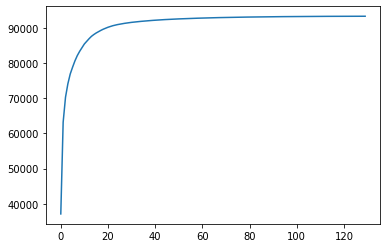

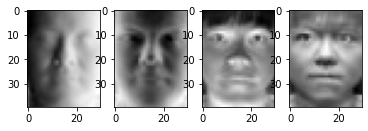

In [ ]:
pca = PCA(optimize=True)
B = pca.fit(x_train)
pca.plot_eigenvals()
num_dim = pca.get_num_components(0.9) # variance
print(num_dim)
B = B[:,:num_dim]
show_images(B, 4)

In [ ]:
class Projection:
    def __init__( self, B ):
        self.B = B

    def reduce_dim( self, X ):
        return  X @ B @ np.linalg.inv(B.T @ B)

    def reconstruct( self, X_reduced ):
        return X_reduced @ B.T

    def get_projection_matrix( self ):
        P = B @ np.linalg.inv(B.T @ B) @ B.T
        return P

    def project( self , X ):
        P = self.get_projection_matrix()
        return X @ P

X_train_reduced.shape=(130, 9)


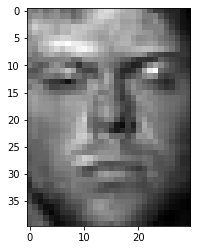

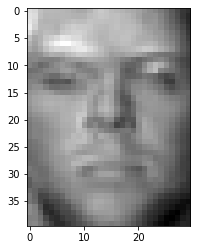

In [ ]:
proj = Projection( B )
X_train_reduced = proj.reduce_dim(x_train )
print("X_train_reduced.shape="+str(X_train_reduced.shape) )
show_images(x_train.T, 1)
r_img = proj.reconstruct( X_train_reduced[0,:])
r_img = np.reshape(r_img,(1200,1))
show_images(r_img, 1)

In [ ]:
X_test_reduced = proj.reduce_dim(x_test)
print("X_test_reduced.shape="+str(X_test_reduced.shape))

X_test_reduced.shape=(5, 9)


In [ ]:
class ImageClassifier:
    def __init__( self, class_count ):
        self.class_count = class_count

    def __get_class_mean( self, X, target ):
        class_count = self.class_count
        N,D = X.shape
        mu = np.zeros((class_count,D))
        for i in range(class_count):
            mu[i,:] = (1/N) * np.sum(X[target == i,: ], axis = 0 )
        return mu

    def __dist(self, v1, v2 ):
        diff = v1-v2
        d = np.sqrt(np.dot(diff,diff))
        return d

    def fit( self,  X, target  ):
        class_count = self.class_count
        mu = self.__get_class_mean( X, target )
        self.mu = mu

    def predict( self, test_img ):
        min_dist = np.float('inf')
        min_class = -1
        for i in range( self.class_count ):
            d = self.__dist(test_img, self.mu[i,:])
            if d < min_dist:
                min_dist = d
                min_class = i

        return min_class, self.mu[min_class,:]

In [ ]:
print("X_test_reduced.shape=" + str(X_test_reduced.shape))
print("X_train_reduced.shape=" + str(X_train_reduced.shape))
img_classifer = ImageClassifier(10)
img_classifer.fit(X_train_reduced,label_train)
recognized_class, mu_rec = img_classifer.predict( X_test_reduced[4,: ] )
print("recognized_class="+ str(recognized_class))

X_test_reduced.shape=(5, 9)
X_train_reduced.shape=(130, 9)
recognized_class=5


<ipython-input-73-c19a42faa67a>:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_dist = np.float('inf')
